<a href="https://colab.research.google.com/github/netomap/flower_classification_/blob/master/FlowerClassification_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import numpy as np
import pathlib
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_zip = keras.utils.get_file(origin=_URL, fname='flower_photos', untar=True)

228818944/228813984 [==============================] - 3s 0us/step


In [3]:
DATA_DIR = pathlib.Path(data_zip)
DATA_DIR

PosixPath('/root/.keras/datasets/flower_photos')

In [4]:
classes_list = DATA_DIR.glob('*')
class_names = np.array([item.name for item in classes_list if item.name != 'LICENSE.txt'])
print (class_names)

['daisy' 'tulips' 'roses' 'sunflowers' 'dandelion']


In [5]:
size = 224
BATCH_SIZE = 50

train_data_generator = keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    zoom_range = 0.2,
    horizontal_flip = True,
    rescale = 1./255,
    validation_split = 0.1
)

train_generator = train_data_generator.flow_from_directory(
    directory = str(DATA_DIR),
    target_size = (size, size),
    classes = list(class_names),
    batch_size = BATCH_SIZE,
    shuffle = True,
    subset = 'training'
)

validation_generator = train_data_generator.flow_from_directory(
    directory = str(DATA_DIR),
    target_size = (size, size),
    classes = list(class_names),
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

TRAIN_STEPS = train_generator.n // train_generator.batch_size
VALIDATION_STEPS = validation_generator.n // validation_generator.batch_size

Found 3306 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


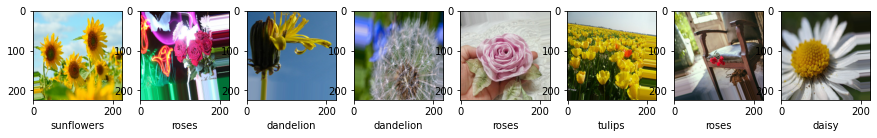

In [6]:
image_batch, label_batch = next(train_generator)
plt.figure(figsize=(15,5))
for k in range(8):
  plt.subplot(1, 8, k+1)
  plt.imshow(image_batch[k])
  #plt.axis('off')
  plt.xlabel(class_names[np.argmax(label_batch[k])])
plt.show()

In [7]:
# importando o modelo mobilenet_v2
url_ = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2'

camada_mobilenet = hub.KerasLayer(url_, input_shape=(size, size, 3))
camada_mobilenet.trainable = False

In [8]:
model = keras.Sequential()

model.add(camada_mobilenet)
model.add(keras.layers.Dense(units=5, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit_generator(
    generator = train_generator,
    steps_per_epoch = TRAIN_STEPS,
    epochs = 5,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps = VALIDATION_STEPS,
    shuffle = True
)

Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/5
66/66 [==============================] - 49s 738ms/step - loss: 0.8433 - accuracy: 0.7024 - val_loss: 0.5661 - val_accuracy: 0.7943
Epoch 2/5
66/66 [==============================] - 48s 733ms/step - loss: 0.4388 - accuracy: 0.8443 - val_loss: 0.4804 - val_accuracy: 0.8286
Epoch 3/5
66/66 [==============================] - 49s 737ms/step - loss: 0.3685 - accuracy: 0.8784 - val_loss: 0.4841 - val_accuracy: 0.8114
Epoch 4/5
66/66 [==============================] - 48s 734ms/step - loss: 0.3357 - accuracy: 0.8821 - val_loss: 0.4625 - val_accuracy: 0.8257
Epoch 5/5
66/66 [==============================] - 49s 742ms/step - loss: 0.3053 - accuracy: 0.8934 - val_loss: 0.4461 - val_accuracy: 0.8486


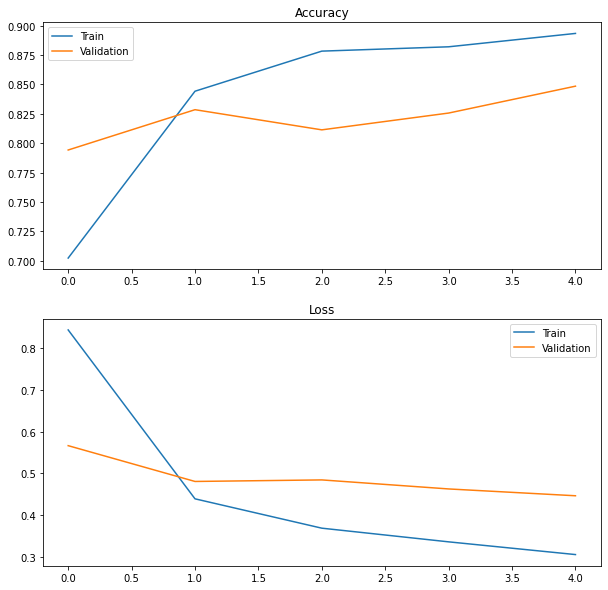

In [10]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epocas = range(len(train_acc))

plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epocas, train_acc, label='Train')
plt.plot(epocas, val_acc, label='Validation')
plt.legend()
plt.title('Accuracy')

plt.subplot(2,1,2)
plt.plot(epocas, train_loss, label='Train')
plt.plot(epocas, val_loss, label='Validation')
plt.legend()
plt.title('Loss')

plt.show()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
_________________________________________________________________
dense (Dense)                (None, 5)                 5010      
Total params: 3,545,275
Trainable params: 5,010
Non-trainable params: 3,540,265
_________________________________________________________________
